In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import os

# Set the number of threads for MKL
os.environ['OMP_NUM_THREADS'] = '6'

df = pd.read_csv('Data Final_Employee Attrition.csv')
df = df.rename(columns={'BusinessTravel': 'Business Travel'})
df = df.rename(columns=lambda col: re.sub(r"\s+", "_", col.lower()))
df = df.drop(columns=['employee_number', 'over_18', 'standard_hours'])
df = df.dropna()

# Define only the numeric columns
cont = df.select_dtypes(include=[np.number])
cont = cont.drop(columns={'education', 'environment_satisfaction',
                          'job_involvement', 'job_level', 'job_satisfaction', 'performance_rating',
                          'relationship_satisfaction', 'stock_option_level', 'work_life_balance'}, axis=1)

cont['attrition'] = df['attrition']
cont.insert(0, 'attrition', cont.pop('attrition'))
cont['attrition'] = cont['attrition'].map({'Yes': 1, 'No': 0})

numerical_cols = ['age', 'daily_rate', 'distance_from_home', 'hourly_rate', 'monthly_income', 'monthly_rate',
                   'num_companies_worked', 'percent_salary_hike', 'total_working_years', 'training_times_last_year',
                   'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_current_manager']

# Use MinMaxScaler on the selected numeric columns
scaler = MinMaxScaler()

columns = cont.columns

cont_scaled = cont.copy()
cont_scaled[numerical_cols] = scaler.fit_transform(cont[numerical_cols])

cont_scaled

,attrition,age,daily_rate,distance_from_home,hourly_rate,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,total_working_years,training_times_last_year,years_at_company,years_in_current_role,years_since_last_promotion,years_with_current_manager
0,1,0.547619,0.715820,0.000000,0.914286,0.262454,0.698053,0.888889,0.000000,0.200,0.000000,0.150,0.222222,0.000000,0.294118
1,0,0.738095,0.126700,0.250000,0.442857,0.217009,0.916001,0.111111,0.857143,0.250,0.500000,0.250,0.388889,0.066667,0.411765
2,1,0.452381,0.909807,0.035714,0.885714,0.056925,0.012126,0.666667,0.285714,0.175,0.500000,0.000,0.000000,0.000000,0.000000
3,0,0.357143,0.923407,0.071429,0.371429,0.100053,0.845814,0.111111,0.000000,0.200,0.500000,0.200,0.388889,0.200000,0.000000
4,0,0.214286,0.350036,0.035714,0.142857,0.129489,0.583738,1.000000,0.071429,0.150,0.500000,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,0.428571,0.559771,0.785714,0.157143,0.082254,0.409396,0.444444,0.428571,0.425,0.500000,0.125,0.111111,0.000000,0.176471
1466,0,0.500000,0.365784,0.178571,0.171429,0.472986,0.777474,0.444444,0.285714,0.225,0.833333,0.175,0.388889,0.066667,0.411765
1467,0,0.214286,0.037938,0.107143,0.814286,0.270300,0.123670,0.111111,0.642857,0.150,0.000000,0.150,0.111111,0.000000,0.176471
1468,0,0.738095,0.659270,0.035714,0.471429,0.230700,0.447661,0.222222,0.214286,0.425,0.500000,0.225,0.333333,0.000000,0.470588


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

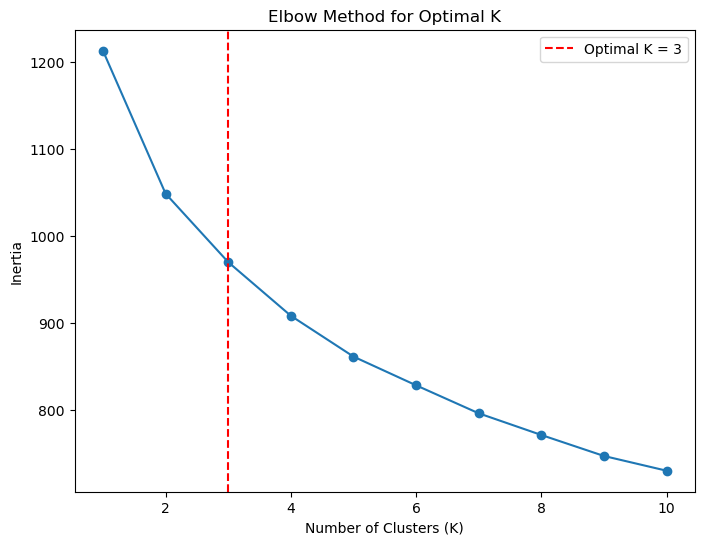

Optimal K: 3


In [31]:
# Elbow Method to find the optimal value of K
X = cont_scaled.drop('attrition', axis=1)

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

second_derivative = np.diff(np.diff(inertia))

optimal_k_index = np.argmax(second_derivative) + 2
optimal_k = k_values[optimal_k_index]

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.legend()
plt.show()

print(f'Optimal K: {optimal_k}')

In [32]:
# Clustering into 3 clusters
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(cont_scaled)

cluster_labels = kmeans.labels_

cont_scaled['cluster'] = cluster_labels

clustered = cont_scaled

clustered

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


,attrition,age,daily_rate,distance_from_home,hourly_rate,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,total_working_years,training_times_last_year,years_at_company,years_in_current_role,years_since_last_promotion,years_with_current_manager,cluster
0,1,0.547619,0.715820,0.000000,0.914286,0.262454,0.698053,0.888889,0.000000,0.200,0.000000,0.150,0.222222,0.000000,0.294118,2
1,0,0.738095,0.126700,0.250000,0.442857,0.217009,0.916001,0.111111,0.857143,0.250,0.500000,0.250,0.388889,0.066667,0.411765,0
2,1,0.452381,0.909807,0.035714,0.885714,0.056925,0.012126,0.666667,0.285714,0.175,0.500000,0.000,0.000000,0.000000,0.000000,2
3,0,0.357143,0.923407,0.071429,0.371429,0.100053,0.845814,0.111111,0.000000,0.200,0.500000,0.200,0.388889,0.200000,0.000000,0
4,0,0.214286,0.350036,0.035714,0.142857,0.129489,0.583738,1.000000,0.071429,0.150,0.500000,0.050,0.111111,0.133333,0.117647,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,0.428571,0.559771,0.785714,0.157143,0.082254,0.409396,0.444444,0.428571,0.425,0.500000,0.125,0.111111,0.000000,0.176471,0
1466,0,0.500000,0.365784,0.178571,0.171429,0.472986,0.777474,0.444444,0.285714,0.225,0.833333,0.175,0.388889,0.066667,0.411765,0
1467,0,0.214286,0.037938,0.107143,0.814286,0.270300,0.123670,0.111111,0.642857,0.150,0.000000,0.150,0.111111,0.000000,0.176471,0
1468,0,0.738095,0.659270,0.035714,0.471429,0.230700,0.447661,0.222222,0.214286,0.425,0.500000,0.225,0.333333,0.000000,0.470588,0


In [33]:
df_clustered = pd.read_csv('Data Final_Employee Attrition.csv')
df_clustered = df_clustered.rename(columns={'BusinessTravel': 'Business Travel'})
employee_number_col = df_clustered.pop('Employee Number')
df_clustered.insert(0, 'Employee Number', employee_number_col)
df_clustered['Cluster'] = clustered['cluster']
df_clustered

,Employee Number,Age,Attrition,Business Travel,Daily Rate,Department,Distance From Home,Education,Education Field,Environment Satisfaction,...,Standard Hours,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Current Manager,Cluster
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,80,0,8,0,1,6,4,0,5,2
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,80,1,10,3,3,10,7,1,7,0
2,4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,80,0,7,3,3,0,0,0,0,2
3,5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,80,0,8,3,3,8,7,3,0,0
4,7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,...,80,1,17,3,3,5,2,0,3,0
1466,2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,...,80,1,9,5,3,7,7,1,7,0
1467,2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,...,80,1,6,0,3,6,2,0,3,0
1468,2065,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,...,80,0,17,3,2,9,6,0,8,0


In [34]:
# Mean Comparison between Clusters
exclude_columns = ['Employee Number', 'Standard Hours', 'Cluster']

result_df = pd.DataFrame()

print("Mean Comparison:")

for cluster_id in df_clustered['Cluster'].unique():
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    
    mean_values = cluster_data.drop(exclude_columns, axis=1).mean(numeric_only=True)
    
    mean_values['Cluster'] = cluster_id
    
    result_df = pd.concat([result_df, mean_values.to_frame().T], ignore_index=True)

result_df = result_df.round(2)
display(result_df.T)

# Attrition Rate & Count of each Cluster
for cluster_id in df_clustered['Cluster'].unique():
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    
    count_values = cluster_data.drop(exclude_columns, axis=1).count()
    count_values['Cluster'] = cluster_id
    
    print(f"\nCluster {cluster_id} Characteristics:")
    
    attrition_rate = cluster_data['Attrition'].value_counts(normalize=True).get('Yes', 0) * 100
    print(f"Attrition Rate: {attrition_rate:.2f}%")
    
    count = len(cluster_data)  # Get the count of rows in the cluster
    print(f"Count: {count}")

Mean Comparison:


,0,1,2
Age,33.05,34.99,44.43
Daily Rate,751.73,816.05,801.07
Distance From Home,10.72,8.97,8.77
Education,2.83,2.88,3.06
Environment Satisfaction,2.46,2.75,2.82
Hourly Rate,65.55,66.27,65.13
Job Involvement,2.53,2.78,2.72
Job Level,1.55,1.66,3.43
Job Satisfaction,2.45,2.81,2.70
Monthly Income,4410.07,4736.32,12413.42



Cluster 2 Characteristics:
Attrition Rate: 100.00%
Count: 229

Cluster 0 Characteristics:
Attrition Rate: 0.00%
Count: 893

Cluster 1 Characteristics:
Attrition Rate: 2.30%
Count: 348


In [35]:
# Mean Comparison between Clusters
exclude_columns = ['Employee Number', 'Standard Hours', 'Cluster']

desired_order = [
    'Age', 'Distance From Home', 'Education', 'Hourly Rate', 'Daily Rate', 'Monthly Rate',
    'Monthly Income', 'Percent Salary Hike', 'Environment Satisfaction', 'Relationship Satisfaction', 'Work Life Balance',
    'Job Satisfaction', 'Performance Rating', 'Stock Option Level', 'Job Level', 'Job Involvement', 'Num Companies Worked',
    'Total Working Years', 'Years At Company', 'Years In Current Role', 'Years With Current Manager',
    'Training Times Last Year', 'Years Since Last Promotion'
]

result_df = pd.DataFrame()

print("Mean Comparison:")

for cluster_id in df_clustered['Cluster'].unique():
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    
    mean_values = cluster_data.drop(exclude_columns, axis=1)[desired_order].mean(numeric_only=True)
    
    mean_values['Cluster'] = cluster_id
    
    result_df = pd.concat([result_df, mean_values.to_frame().T])

result_df = result_df.round(2)
result_df = result_df.set_index('Cluster')
result_df = result_df.sort_values(by='Cluster', axis=0)
display(result_df.T)

# Attrition Rate & Count of each Cluster
for cluster_id in df_clustered['Cluster'].unique():
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    
    count_values = cluster_data.drop(exclude_columns, axis=1)[desired_order].count()
    count_values['Cluster'] = cluster_id
    
    print(f"\nCluster {cluster_id} Characteristics:")
    
    attrition_rate = cluster_data['Attrition'].value_counts(normalize=True).get('Yes', 0) * 100
    attrition_rate = round(attrition_rate, 2)
    print(f"Attrition Rate: {attrition_rate}%")
    
    count = len(cluster_data)
    print(f"Count: {count}")

Mean Comparison:


Cluster,0.0,1.0,2.0
Age,34.99,44.43,33.05
Distance From Home,8.97,8.77,10.72
Education,2.88,3.06,2.83
Hourly Rate,66.27,65.13,65.55
Daily Rate,816.05,801.07,751.73
Monthly Rate,14042.27,14842.04,14565.42
Monthly Income,4736.32,12413.42,4410.07
Percent Salary Hike,15.32,14.96,15.16
Environment Satisfaction,2.75,2.82,2.46
Relationship Satisfaction,2.74,2.73,2.59



Cluster 2 Characteristics:
Attrition Rate: 100.0%
Count: 229

Cluster 0 Characteristics:
Attrition Rate: 0%
Count: 893

Cluster 1 Characteristics:
Attrition Rate: 2.3%
Count: 348


In [36]:
# Principal Component Analysis
from sklearn.decomposition import PCA
import pandas as pd

X = clustered.drop('cluster', axis=1)
labels = clustered['cluster']
columns = X.columns

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

feature_loadings = pd.DataFrame(pca.components_, columns=columns)
feature_loadings.index = ['PC1', 'PC2', 'PC3']

print("Feature Loadings:")
display(feature_loadings)

print("\nVariance explained by each component:", pca.explained_variance_ratio_)

Feature Loadings:


,attrition,age,daily_rate,distance_from_home,hourly_rate,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,total_working_years,training_times_last_year,years_at_company,years_in_current_role,years_since_last_promotion,years_with_current_manager
PC1,-0.508390,0.295998,0.026279,-0.039896,-0.011604,0.416587,0.000209,0.061121,-0.012670,0.357921,0.006062,0.263313,0.312694,0.275662,0.320659
PC2,0.818198,0.152797,-0.131145,0.172834,-0.027844,0.232215,0.069239,0.172179,-0.037962,0.207296,-0.073778,0.151817,0.150767,0.226730,0.154773
PC3,-0.024480,0.272794,0.300099,-0.154238,0.229566,0.136591,0.096611,0.724805,-0.010645,0.129451,-0.058694,-0.165529,-0.227863,-0.196184,-0.258797



Variance explained by each component: [0.19147028 0.12841724 0.10032418]
